In [1]:
# backend = tensorflow = K
import keras.backend as K
import numpy as np
np.random.seed(777)

x = np.random.rand(3, 3)
y = np.random.rand(3, 2)
# initialize 불필요
x_var = K.variable(value=x)
y_var = K.variable(value=y)

C:\Users\acorn\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
xy = K.dot(x_var, y_var)
matrix_product = K.eval(xy)

In [32]:
# bag of word
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
text_data = np.array(['I love Brazil. Brazil!',
                     'Sweden is best',
                     'Germany beats both'])
count = CountVectorizer(token_pattern=r'[a-zA-Z]+')
bag_of_words = count.fit_transform(text_data)
bag_of_words.toarray()

array([[0, 0, 0, 2, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 0, 0, 0]], dtype=int64)

In [33]:
feature_names = count.get_feature_names()
feature_names

['beats', 'best', 'both', 'brazil', 'germany', 'i', 'is', 'love', 'sweden']

In [34]:
pd.DataFrame(bag_of_words.toarray(), columns=feature_names)

,beats,best,both,brazil,germany,i,is,love,sweden
0,0,0,0,2,0,1,0,1,0
1,0,1,0,0,0,0,1,0,1
2,1,0,1,0,1,0,0,0,0


In [35]:
# 한글인 경우 stopword 단어장을 만들어 사용해야 한다.
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

tokenized_words = ['i', 'am', 'going', 'to', 'go', 'to', 'the', 'store', 'and', 'park']
stop_words = stopwords.words('english')
stop_words[:5]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acorn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we']

In [37]:
[word for word in tokenized_words if word not in stop_words]

['going', 'go', 'store', 'park']

In [40]:
# 어근 추출
from nltk.stem.porter import PorterStemmer
tokenized_words = ['i', 'am', 'humbled', 'by', 'this', 'tranditional', 'meeting']
porter = PorterStemmer()
[porter.stem(word) for word in tokenized_words]

['i', 'am', 'humbl', 'by', 'thi', 'trandit', 'meet']

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
text_data = np.array(['I love Brazil. Brazil!',
                     'Sweden is best',
                     'Germany beats both'])
tfidf = TfidfVectorizer()
feature_matrix = tfidf.fit_transform(text_data)
feature_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.89442719, 0.        ,
        0.        , 0.4472136 , 0.        ],
       [0.        , 0.57735027, 0.        , 0.        , 0.        ,
        0.57735027, 0.        , 0.57735027],
       [0.57735027, 0.        , 0.57735027, 0.        , 0.57735027,
        0.        , 0.        , 0.        ]])

In [42]:
tfidf.get_feature_names()

['beats', 'best', 'both', 'brazil', 'germany', 'is', 'love', 'sweden']

In [45]:
from nltk.tokenize import word_tokenize, sent_tokenize
string = "The science of today is the technology of tomorrow. Tomorrow is today."
word_tokenize(string)

['The',
 'science',
 'of',
 'today',
 'is',
 'the',
 'technology',
 'of',
 'tomorrow',
 '.',
 'Tomorrow',
 'is',
 'today',
 '.']

In [46]:
sent_tokenize(string)

['The science of today is the technology of tomorrow.', 'Tomorrow is today.']

In [48]:
# Embedding
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
# 다차원 벡터를 -> matrix -> 저차원 벡터
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [60]:
np.random.seed(777)
top_words = 5000
# imdb 영화 평가 데이터 negative/positive :target
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
max_review_length = 500

In [72]:
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))

In [73]:
model.add(Conv1D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dropout(0.2))
# positive/negative
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# fit() return : history = epoch마다의 --- 찾아보도록
model.fit(X_train, y_train, epochs=3, batch_size=64)
# evaluate() return : cost, accuracy
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
model.summary()

ValueError: Error when checking target: expected dense_3 to have shape (1,) but got array with shape (10,)

In [216]:
# mnist를 keras RNN으로
# RNN : base RNN
# simple RNN : output이 input으로 feedback
# LSTM : 알아서 알아봐라
# GRU : LSTM 속도 개선
import keras
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import SimpleRNN
from keras import initializers
from keras.optimizers import RMSprop

batch_size = 32
num_classes = 10
epochs = 10
hidden_units = 100
learning_rate = 1e-6
clip_norm = 1.0

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1, 1)
x_test = x_test.reshape(x_test.shape[0], -1, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [217]:
print('차원 :', x_train.shape)

차원 : (60000, 784, 1)


In [218]:
model = Sequential()
model.add(SimpleRNN(hidden_units, kernel_initializer=initializers.RandomNormal(stddev=0.001),
                   recurrent_initializer=initializers.Identity(gain=1.0),
                   activation='relu',
                   input_shape=x_train.shape[1:]))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
rmsprop = RMSprop(lr=learning_rate)
model.compile(loss='categorical_crossentropy',
             optimizer=rmsprop,
             metrics=['accuracy'])

In [219]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_13 (SimpleRNN)    (None, 100)               10200     
_________________________________________________________________
dense_31 (Dense)             (None, 10)                1010      
_________________________________________________________________
activation_13 (Activation)   (None, 10)                0         
Total params: 11,210
Trainable params: 11,210
Non-trainable params: 0
_________________________________________________________________


In [220]:
model.fit(x_train, y_train,
         batch_size=batch_size,
         epochs=epochs,
         verbose=1,
         validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 180s 3ms/step - loss: 2.1516 - acc: 0.1941 - val_loss: 2.0119 - val_acc: 0.2308
Epoch 2/10
60000/60000 [==============================] - 176s 3ms/step - loss: 1.9808 - acc: 0.2369 - val_loss: 1.9649 - val_acc: 0.2420
Epoch 3/10
60000/60000 [==============================] - 176s 3ms/step - loss: 1.9467 - acc: 0.2442 - val_loss: 1.9323 - val_acc: 0.2569
Epoch 4/10
60000/60000 [==============================] - 178s 3ms/step - loss: 1.9096 - acc: 0.2526 - val_loss: 1.8789 - val_acc: 0.2606
Epoch 5/10
60000/60000 [==============================] - 180s 3ms/step - loss: 1.8464 - acc: 0.2868 - val_loss: 1.8010 - val_acc: 0.3172
Epoch 6/10
60000/60000 [==============================] - 177s 3ms/step - loss: 1.7565 - acc: 0.3468 - val_loss: 1.7209 - val_acc: 0.3669
Epoch 7/10
60000/60000 [==============================] - 176s 3ms/step - loss: 1.6907 - acc: 0.3905 - val_loss: 1.6792 - 

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("test score:", scores[0])
print("test accuracy:", scores[1])

In [98]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import TimeDistributed

length = 5
seq = np.array([i/float(length) for i in range(length)])
X = seq.reshape(1, length, 1)
y = seq.reshape(1, length, 1)

n_neurons = length
n_batch = 1
n_epoch = 500

model = Sequential()
# Param = 140 = (1 + 5)(state input, input) * 4(Weight) * 5(cell) + 4(bias) * 5(cell)
model.add(LSTM(n_neurons, input_shape=(length, 1), return_sequences=True))
#model.add(Dense(length))
model.add(TimeDistributed(Dense(1)))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

model.fit(X, y, epochs=n_epoch, batch_size=n_batch, verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 5, 5)              140       
_________________________________________________________________
time_distributed_2 (TimeDist (None, 5, 1)              6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
 - 1s - loss: 0.1929
Epoch 2/500
 - 0s - loss: 0.1901
Epoch 3/500
 - 0s - loss: 0.1873
Epoch 4/500
 - 0s - loss: 0.1845
Epoch 5/500
 - 0s - loss: 0.1817
Epoch 6/500
 - 0s - loss: 0.1790
Epoch 7/500
 - 0s - loss: 0.1763
Epoch 8/500
 - 0s - loss: 0.1736
Epoch 9/500
 - 0s - loss: 0.1709
Epoch 10/500
 - 0s - loss: 0.1683
Epoch 11/500
 - 0s - loss: 0.1657
Epoch 12/500
 - 0s - loss: 0.1631
Epoch 13/500
 - 0s - loss: 0.1606
Epoch 14/500
 - 0s - loss: 0.1581
Epoch 15/500
 - 0s - loss: 0.1556
Epoch 16/500
 - 0s - loss: 0.1531


Epoch 222/500
 - 0s - loss: 0.0052
Epoch 223/500
 - 0s - loss: 0.0052
Epoch 224/500
 - 0s - loss: 0.0052
Epoch 225/500
 - 0s - loss: 0.0051
Epoch 226/500
 - 0s - loss: 0.0051
Epoch 227/500
 - 0s - loss: 0.0051
Epoch 228/500
 - 0s - loss: 0.0050
Epoch 229/500
 - 0s - loss: 0.0050
Epoch 230/500
 - 0s - loss: 0.0050
Epoch 231/500
 - 0s - loss: 0.0049
Epoch 232/500
 - 0s - loss: 0.0049
Epoch 233/500
 - 0s - loss: 0.0049
Epoch 234/500
 - 0s - loss: 0.0049
Epoch 235/500
 - 0s - loss: 0.0048
Epoch 236/500
 - 0s - loss: 0.0048
Epoch 237/500
 - 0s - loss: 0.0048
Epoch 238/500
 - 0s - loss: 0.0047
Epoch 239/500
 - 0s - loss: 0.0047
Epoch 240/500
 - 0s - loss: 0.0047
Epoch 241/500
 - 0s - loss: 0.0047
Epoch 242/500
 - 0s - loss: 0.0046
Epoch 243/500
 - 0s - loss: 0.0046
Epoch 244/500
 - 0s - loss: 0.0046
Epoch 245/500
 - 0s - loss: 0.0045
Epoch 246/500
 - 0s - loss: 0.0045
Epoch 247/500
 - 0s - loss: 0.0045
Epoch 248/500
 - 0s - loss: 0.0045
Epoch 249/500
 - 0s - loss: 0.0044
Epoch 250/500
 - 0s 

Epoch 457/500
 - 0s - loss: 0.0019
Epoch 458/500
 - 0s - loss: 0.0019
Epoch 459/500
 - 0s - loss: 0.0019
Epoch 460/500
 - 0s - loss: 0.0019
Epoch 461/500
 - 0s - loss: 0.0019
Epoch 462/500
 - 0s - loss: 0.0019
Epoch 463/500
 - 0s - loss: 0.0019
Epoch 464/500
 - 0s - loss: 0.0019
Epoch 465/500
 - 0s - loss: 0.0019
Epoch 466/500
 - 0s - loss: 0.0019
Epoch 467/500
 - 0s - loss: 0.0019
Epoch 468/500
 - 0s - loss: 0.0019
Epoch 469/500
 - 0s - loss: 0.0019
Epoch 470/500
 - 0s - loss: 0.0019
Epoch 471/500
 - 0s - loss: 0.0019
Epoch 472/500
 - 0s - loss: 0.0019
Epoch 473/500
 - 0s - loss: 0.0019
Epoch 474/500
 - 0s - loss: 0.0018
Epoch 475/500
 - 0s - loss: 0.0018
Epoch 476/500
 - 0s - loss: 0.0018
Epoch 477/500
 - 0s - loss: 0.0018
Epoch 478/500
 - 0s - loss: 0.0018
Epoch 479/500
 - 0s - loss: 0.0018
Epoch 480/500
 - 0s - loss: 0.0018
Epoch 481/500
 - 0s - loss: 0.0018
Epoch 482/500
 - 0s - loss: 0.0018
Epoch 483/500
 - 0s - loss: 0.0018
Epoch 484/500
 - 0s - loss: 0.0018
Epoch 485/500
 - 0s 

In [119]:
import matplotlib.pyplot as plt
import os
import re

DATA_DIR = "C:\\Users\\acorn\\Documents\\acorn"
fld = open(os.path.join(DATA_DIR, "LD2011_2014.txt"), "rb")
data = []
line_num = 0
cid = 250

for line in fld:
    if line.startswith(b"\"\";"):
        continue
    if line_num % 100 == 0:
        print("{:d} lines read".format(line_num))
    cols = [float(re.sub(b",", b".", x)) for x in line.strip().split(b";")[1:]]
    data.append(cols[cid])
    line_num += 1
fld.close()

0 lines read
100 lines read
200 lines read
300 lines read
400 lines read
500 lines read
600 lines read
700 lines read
800 lines read
900 lines read
1000 lines read
1100 lines read
1200 lines read
1300 lines read
1400 lines read
1500 lines read
1600 lines read
1700 lines read
1800 lines read
1900 lines read
2000 lines read
2100 lines read
2200 lines read
2300 lines read
2400 lines read
2500 lines read
2600 lines read
2700 lines read
2800 lines read
2900 lines read
3000 lines read
3100 lines read
3200 lines read
3300 lines read
3400 lines read
3500 lines read
3600 lines read
3700 lines read
3800 lines read
3900 lines read
4000 lines read
4100 lines read
4200 lines read
4300 lines read
4400 lines read
4500 lines read
4600 lines read
4700 lines read
4800 lines read
4900 lines read
5000 lines read
5100 lines read
5200 lines read
5300 lines read
5400 lines read
5500 lines read
5600 lines read
5700 lines read
5800 lines read
5900 lines read
6000 lines read
6100 lines read
6200 lines read
6300

49100 lines read
49200 lines read
49300 lines read
49400 lines read
49500 lines read
49600 lines read
49700 lines read
49800 lines read
49900 lines read
50000 lines read
50100 lines read
50200 lines read
50300 lines read
50400 lines read
50500 lines read
50600 lines read
50700 lines read
50800 lines read
50900 lines read
51000 lines read
51100 lines read
51200 lines read
51300 lines read
51400 lines read
51500 lines read
51600 lines read
51700 lines read
51800 lines read
51900 lines read
52000 lines read
52100 lines read
52200 lines read
52300 lines read
52400 lines read
52500 lines read
52600 lines read
52700 lines read
52800 lines read
52900 lines read
53000 lines read
53100 lines read
53200 lines read
53300 lines read
53400 lines read
53500 lines read
53600 lines read
53700 lines read
53800 lines read
53900 lines read
54000 lines read
54100 lines read
54200 lines read
54300 lines read
54400 lines read
54500 lines read
54600 lines read
54700 lines read
54800 lines read
54900 lines re

97600 lines read
97700 lines read
97800 lines read
97900 lines read
98000 lines read
98100 lines read
98200 lines read
98300 lines read
98400 lines read
98500 lines read
98600 lines read
98700 lines read
98800 lines read
98900 lines read
99000 lines read
99100 lines read
99200 lines read
99300 lines read
99400 lines read
99500 lines read
99600 lines read
99700 lines read
99800 lines read
99900 lines read
100000 lines read
100100 lines read
100200 lines read
100300 lines read
100400 lines read
100500 lines read
100600 lines read
100700 lines read
100800 lines read
100900 lines read
101000 lines read
101100 lines read
101200 lines read
101300 lines read
101400 lines read
101500 lines read
101600 lines read
101700 lines read
101800 lines read
101900 lines read
102000 lines read
102100 lines read
102200 lines read
102300 lines read
102400 lines read
102500 lines read
102600 lines read
102700 lines read
102800 lines read
102900 lines read
103000 lines read
103100 lines read
103200 lines rea

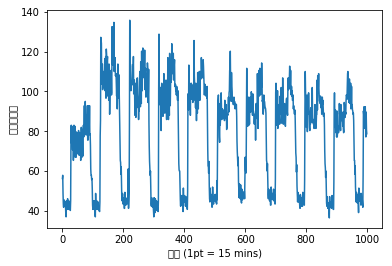

In [120]:
NUM_ENTRIES = 1000
plt.plot(range(NUM_ENTRIES), data[0:NUM_ENTRIES])
plt.ylabel("전기소비량")
plt.xlabel("시간 (1pt = 15 mins)")
plt.show()

np.save(os.path.join(DATA_DIR, "LD_250.npy"), np.array(data))

In [173]:
from keras.layers.core import Dense
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import math
import os

data = np.load(os.path.join(DATA_DIR, "LD_250.npy"))
STATELESS = True
# NUM_TIMESTEPS는 기간 
# 다음값을 예측 20개
NUM_TIMESTEPS = 20
HIDDEN_SIZE = 10
BATCH_SIZE = 96
NUM_EPOCHS = 5

data = data.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0,1), copy=False)
data = scaler.fit_transform(data)

X = np.zeros((data.shape[0], NUM_TIMESTEPS))
Y = np.zeros((data.shape[0], 1))
for i in range(len(data) - NUM_TIMESTEPS - 1):
    X[i] = data[i:i + NUM_TIMESTEPS].T
    Y[i] = data[i + NUM_TIMESTEPS + 1]
X = np.expand_dims(X, axis=2)

In [174]:
sp = int(0.7 * len(data))
Xtrain, Xtest, Ytrain, Ytest = X[0:sp], X[sp:], Y[0:sp], Y[sp:]
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(98179, 20, 1) (42077, 20, 1) (98179, 1) (42077, 1)


In [175]:
# 비상태 보존
if STATELESS:
    model = Sequential()
    model.add(LSTM(HIDDEN_SIZE, input_shape=(NUM_TIMESTEPS, 1), return_sequences=False))
    model.add(Dense(1))
# 상태 보존 : 마지막 state값을 다음 batch의 초기 state값으로 활용
else:
    model = Sequential()
    model.add(LSTM(HIDDEN_SIZE, stateful=True, batch_input_shape=(BATCH_SIZE, NUM_TIMESTEPS, 1), return_sequences=False))
    model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

if STATELESS:
    model.fit(Xtrain, Ytrain, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(Xtest, Ytest), shuffle=False)
else:
    train_size = (Xtrain.shape[0] // BATCH_SIZE) * BATCH_SIZE
    test_size = (Xtest.shape[0] // BATCH_SIZE) * BATCH_SIZE
    Xtrain, Ytrain = Xtrain[0:train_size], Ytrain[0:train_size]
    Xtest, Ytest = Xtest[0:test_size], Ytest[0:test_size]
    print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)
    for i in range(NUM_EPOCHS):
        print("EPOCH {:d}/{:d}".format(i+1, NUM_EPOCHS))
        model.fit(Xtrain, Ytrain, batch_size=BATCH_SIZE, epochs=1, validation_data=(X_test, Ytest), shuffle=False)
        model.reset_states()

Train on 98179 samples, validate on 42077 samples
Epoch 1/5
98179/98179 [==============================] - 9s 96us/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 2/5
98179/98179 [==============================] - 8s 82us/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 3/5
98179/98179 [==============================] - 8s 80us/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 4/5
98179/98179 [==============================] - 8s 79us/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 5/5
98179/98179 [==============================] - 8s 80us/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0036 - val_mean_squared_error: 0.0036


In [176]:
score, _ = model.evaluate(Xtest, Ytest, batch_size=BATCH_SIZE)
rmse = math.sqrt(score)
print("\nMSE: {:.3f}, RMSE: {:3f}".format(score, rmse))

42077/42077 [==============================] - 1s 16us/step

MSE: 0.004, RMSE: 0.060234


In [188]:
from keras.layers.recurrent import SimpleRNN
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

INPUT_FILE = "./alice_in_wonderland.txt"

fin = open(INPUT_FILE, "rb")
lines = []
for line in fin:
    line = line.strip().lower()
    line = line.decode("ascii", "ignore")
    if len(line) == 0:
        continue
    lines.append(line)
fin.close()
text = " ".join(lines)

In [189]:
# set : 키의 집합
chars = set([c for c in text])
nb_chars = len(chars)
char2index = dict((c, i) for i, c in enumerate(chars))
index2char = dict((i, c) for i, c in enumerate(chars))

In [193]:
# 10개의 단어를 중심으로 다음에 올 알파벳 예측
SEQLEN = 10
STEP = 1
input_chars = list()
label_chars = list()

for i in range(0, len(text) - SEQLEN, STEP):
    input_chars.append(text[i:i + SEQLEN])
    label_chars.append(text[i + SEQLEN])
# 위의 데이터를 vectorization
X = np.zeros((len(input_chars), SEQLEN, nb_chars), dtype=np.bool)
y = np.zeros((len(input_chars), nb_chars), dtype=np.bool)

for i, input_char in enumerate(input_chars):
    for j, ch in enumerate(input_char):
        X[i, j, char2index[ch]] = 1
    y[i, char2index[label_chars[i]]] = 1

In [194]:
HIDDEN_SIZE = 128
BATCH_SIZE = 128
NUM_ITERATIONS = 25
NUM_EPOCHS_PER_ITERATION = 1
NUM_PREDS_PER_EPOCH = 100
model = Sequential()
model.add(SimpleRNN(HIDDEN_SIZE, return_sequences=False, input_shape=(SEQLEN, nb_chars), unroll=True))
model.add(Dense(nb_chars))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy", optimizer='rmsprop')

In [198]:
for iteration in range(NUM_ITERATIONS):
    print("=" * 50)
    print("Iteration #: %d" % iteration)
    model.fit(X, y, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS_PER_ITERATION)
    test_idx = np.random.randint(len(input_chars))
    test_chars = input_chars[test_idx]
    print("Generating from seed: %s" % test_chars)
    print(test_chars, end="")
    for i in range(NUM_PREDS_PER_EPOCH):
        Xtest = np.zeros((1, SEQLEN, nb_chars))
        for i, ch in enumerate(test_chars):
            Xtest[0, i, char2index[ch]] = 1
        pred = model.predict(Xtest, verbose=0)[0]
        ypred = index2char[np.argmax(pred)]
        print(ypred, end="")
        test_chars = test_chars[1:] + ypred
    print()

Iteration #: 0
Epoch 1/1
158773/158773 [==============================] - 7s 43us/step - loss: 1.5435
Generating from seed:  mineral, 
 mineral, and the queen the some the courd the same the courd the same the courd the same the courd the same t
Iteration #: 1
Epoch 1/1
158773/158773 [==============================] - 7s 45us/step - loss: 1.5266
Generating from seed:  like that
 like that she had not the caterpillar was the gryphon a made the found the courted the door the little beange
Iteration #: 2
Epoch 1/1
158773/158773 [==============================] - 7s 45us/step - loss: 1.5111
Generating from seed: se! who ev
se! who every with the terms of the time of the remain of the loot a mores in a long of the terms of the time 
Iteration #: 3
Epoch 1/1
158773/158773 [==============================] - 7s 45us/step - loss: 1.4968
Generating from seed: ater, and 
ater, and she was a little the thing the mock turtle the remark, and she was a little the thing the mock turtl
Iteration #: 4
E